### Linear Regression 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn import datasets, linear_model
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score  
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My\ Drive/CS\ 4641


/content/drive/My Drive/CS 4641


In [ ]:
df = pd.read_csv('diabetes_cleaned_replaced.csv')
df = df.loc[:, df.columns != '0']
df = df.loc[:, df.columns != '1']
df = df.loc[:, df.columns != 'Unnamed: 0']
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,10.0,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276.00,250.01,255.000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,30.0,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8.00,250.43,403.000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,40.0,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197.00,157.00,250.000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,50.0,2.0,1.0,2.0,3.0,31.0,6.0,16.0,0.0,0.0,0.0,414.00,411.00,250.000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,70.0,1.0,1.0,7.0,5.0,73.0,0.0,12.0,0.0,0.0,0.0,428.00,492.00,250.000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.0,1.0,50.0,1.0,3.0,7.0,5.0,39.0,2.0,28.0,0.0,0.0,0.0,823.00,891.00,489.876,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101762,1.7,1.0,50.0,1.0,6.0,7.0,13.0,74.0,6.0,64.0,0.0,0.0,0.0,414.00,357.00,250.600,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101763,0.0,1.0,10.0,1.0,7.0,7.0,1.0,59.0,6.0,9.0,0.0,0.0,1.0,250.13,477.60,477.600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101764,0.4,0.0,70.0,2.0,1.0,1.0,4.0,41.0,0.0,13.0,0.0,0.0,0.0,491.00,250.00,272.000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [ ]:
hospitalLength_Y = df[['8']]
diabetes_X = df.loc[:, df.columns != '8']
#df1 = df[['18', '20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36', '37',]]
#diabetes_X = diabetes_X.loc[:, diabetes_X.columns != '36'] #Drop insulin level
#diabetes_X #Missing 8th feature which is hospital length 
#diabetes_X = df1
diabetes_X


,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,10.0,1.0,1.0,7.0,59.0,0.0,18.0,0.0,0.0,0.0,276.00,250.01,255.000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,30.0,1.0,1.0,7.0,44.0,1.0,16.0,0.0,0.0,0.0,8.00,250.43,403.000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,40.0,1.0,1.0,7.0,51.0,0.0,8.0,0.0,0.0,0.0,197.00,157.00,250.000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,50.0,2.0,1.0,2.0,31.0,6.0,16.0,0.0,0.0,0.0,414.00,411.00,250.000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,70.0,1.0,1.0,7.0,73.0,0.0,12.0,0.0,0.0,0.0,428.00,492.00,250.000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.0,1.0,50.0,1.0,3.0,7.0,39.0,2.0,28.0,0.0,0.0,0.0,823.00,891.00,489.876,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101762,1.7,1.0,50.0,1.0,6.0,7.0,74.0,6.0,64.0,0.0,0.0,0.0,414.00,357.00,250.600,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101763,0.0,1.0,10.0,1.0,7.0,7.0,59.0,6.0,9.0,0.0,0.0,1.0,250.13,477.60,477.600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101764,0.4,0.0,70.0,2.0,1.0,1.0,41.0,0.0,13.0,0.0,0.0,0.0,491.00,250.00,272.000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


# Linear Regression for Length of Hospital Visit - 30% Accuracy

In [ ]:
#Predict length of hospital visit using linear regression
#I tried using ridge and lasso regression with different alpha values but all converged with accuracies 
#around 30%.
#alphas = [.001, .002, .003, .004, .005, .006, .007, .008, .009, .01]
#for i in range(0, len(alphas)): (to test ridge/lasso regression)
model = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(diabetes_X, hospitalLength_Y, test_size =0.2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
difference = np.square(y_pred - y_test)
mean_sq_error = np.mean(difference)
r_sq = model.score(x_test, y_test)
#r_sqarray.append(r_sq)
print("Accuracy: ", r_sq)
print(mean_sq_error[0])

pls = PLSRegression(n_components = 1)
pls.fit(x_train, y_train)
r_sq2 = pls.score(x_test, y_test)
print("Accuracy using PLSR: ", r_sq2)


Accuracy:  0.2953948278478372
6.270923599508207
Accuracy using PLSR:  0.26720175959528314



Random forest, 
plot graphs of features,
Potential other evaluation metrics,
plsr,
try multiple y features

# Linear Regression for Calculating Insulin Level (Irrelevant)

In [ ]:
#Test insulin level using linear regression - results didn't make sense since insulinLevel is categorical
model2 = LinearRegression()
diabetes_X = df.loc[:, df.columns != '36']
insulinLevel_Y = df[['36']]
x_train, x_test, y_train, y_test = train_test_split(diabetes_X, insulinLevel_Y, test_size =0.2)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print("y predicted: ", y_pred)
difference = np.square(y_pred - y_test)
mean_sq_error = np.mean(difference)
print("average error: ", mean_sq_error[0])
r_sq = model.score(x_test, y_test)
print("Coefficent of Determination: ", r_sq)
print(metrics.r2_score(y_test, y_pred))

y predicted:  [[0.23064472]
 [0.7614079 ]
 [0.90634686]
 ...
 [1.21471544]
 [1.5532574 ]
 [1.18493292]]
average error:  0.3484195156963481
Coefficent of Determination:  -2040.6639228647225
0.6686374570710133


# Logistic Regression for Insulin Level - 75% accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  100
0.47233958926992237
0.47233958926992237


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  200
0.5118404244865874
0.5118404244865874


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  300
0.5345877960106121
0.5345877960106121


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  400
0.5483443057875602
0.5483443057875602


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  500
0.55669647243785
0.55669647243785


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  1000
0.6088729488061315
0.6088729488061315


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  2000
0.6810946251351085
0.6810946251351085


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  3000
0.7417706593298614
0.7417706593298614


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  4000
0.7510563034293014
0.7510563034293014
Coefficent of Determination for  5000
0.7449641348137959
0.7449641348137959


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 1.0, 'Accuracy vs Iterations for Predicting Insulin Level Using Logistic Regression')

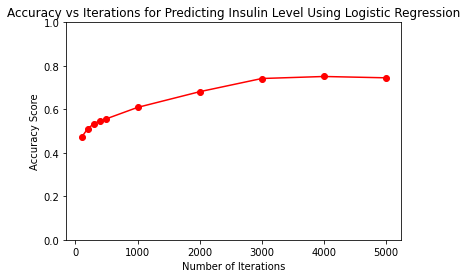

In [ ]:
#Test insulin level using logistic regression

Iterations = [100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
r_sqarray = []
for i in range(0, len(Iterations)):
  model = LogisticRegression(max_iter = Iterations[i])
  diabetes_X = df.loc[:, df.columns != '36']
  insulinLevel_Y = df[['36']]
  x_train, x_test, y_train, y_test = train_test_split(diabetes_X, insulinLevel_Y, test_size =0.2)
  model.fit(x_train, y_train.values.ravel())
  y_pred = model.predict(x_test)
  r_sq = model.score(x_test, y_test)
  r_sqarray.append(r_sq)
  print("Coefficent of Determination for ", Iterations[i])
  print(r_sq)
  scores_classification = accuracy_score(y_pred, y_test)
  print(scores_classification)


plt.plot(Iterations[0:len(r_sqarray)], r_sqarray, 'ro-')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Iterations for Predicting Insulin Level Using Logistic Regression')

# Logistic Regression for Liklihood of Being Readmitted - 58% Accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  100
0.552323867544463


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  200
0.5566473420457895


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  300
0.5660312469293505


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  400
0.5679964626117716


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  500
0.5654416822246241


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  1000
0.5775277586715142


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  2000
0.5724181978972193


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  3000
0.5665716812420163


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficent of Determination for  4000
0.5690282008450428
Coefficent of Determination for  5000
0.5708460253512823


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 1.0, 'Accuracy vs Iterations for Predicting Readmitted Liklihood Using Logistic Regression')

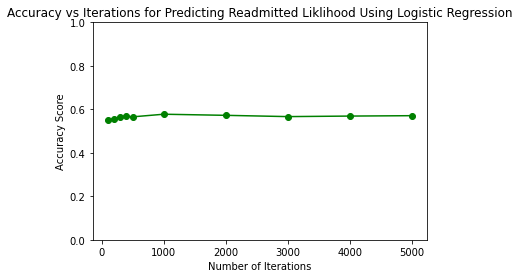

In [ ]:
Iterations = [100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
r_sqarray = []
for i in range(0, len(Iterations)):
  model = LogisticRegression(max_iter=Iterations[i])
  diabetes_X = df.loc[:, df.columns != '44']
  readmitted_Y = df[['44']]
  x_train, x_test, y_train, y_test = train_test_split(diabetes_X, readmitted_Y, test_size =0.2)
  model.fit(x_train, y_train.values.ravel())
  y_pred = model.predict(x_test)
  r_sq = model.score(x_test, y_test)
  r_sqarray.append(r_sq)
  print("Coefficent of Determination for ", Iterations[i])
  print(r_sq)

plt.plot(Iterations, r_sqarray, 'go-')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Iterations for Predicting Readmitted Liklihood Using Logistic Regression')